### This is a collection of data from a company wishing to process its customer records for business purposes (acw_user_data.csv). The existing systems in-place at the company only export to a CSV file, and this is not in an appropriate format for analysis. 

+ This project is designed to evaluate an ability to read and write file formats of common types used in Data Science, and to manipulate complex data into different representations.The tasks provided here are indicative of Data Pre-processing workloads which are commonto all Data Science projects. 
+ This assignment makes use of an extensive collection of mocked data. These have been generated with some resemblance to real world values and distributions, including some relations between data elements. 

##### Background

+ the task is to prepare this data for further analyses by your colleagues within the company, including representation changes, filtering, and deriving some new attributes / metrics for them.
+ These data include attributes such as first name, second name, credit card number, marital status, and even contains data on the customer’s car. The number of records provided is significant, and therefore it is expected that solutions are robust to varying types of data, and varying values, offering a programmatic solution. 



+ Importing the needed Libraries

In [1]:
import csv
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

+ This function 'int_checker' returns a nonetype variable in a situation where the value inputed is missing. 

In [2]:
def int_checker(value):
    try:
        isinstance(value, int)
        return int(value)
    except:
        return None

## STEP 1


+ Data ("Acw_user_data".csv) was read in using a CSVdictReader method. 

+ CSVdictReader method : This maps the information from the Csv as a dictionary in the form of rows.

+ Our Data is then nested and arranged to the required format the user needs it.

+ A 'for loop' was further included to iterate through the data row by row. 

+ the information is then cast to its type as it is saved in the list created(New_Dictionary) to append the rows when iterated.

+ Our Function int_Checker is applied to the Dependents column because it appears to have missing columns. 

+ int_checker funtion : replaces missing columns with the NoneType to reduce inconsistencies.

+ The list titled New_Dictionary will be referred to throughout the course of the project.


In [3]:
New_Dictionary = []
with open('acw_user_data.csv', 'r') as new_data_entry:
    Csv_data = csv.DictReader(new_data_entry)
    

    for row in Csv_data:
        New_Dictionary.append({'first_name' : row['First Name'],
        'last_name' : row['Last Name'],
        'age' : (int(row["Age (Years)"])),
        'sex' : row['Sex'],
        'retired' : row['Retired'],
        'marital_status' : row["Marital Status"],
        'dependents' : int_checker(row["Dependants"]),
        'salary' : (float(row['Yearly Salary (Â£)'])),
        'pension' : (float(row["Yearly Pension (Â£)"])),
        'company' : row['Employer Company'],
        'Distance' : (float(row['Distance Commuted to Work (miles)'])),
        'Vehilcle_details' : { 'Vehicle_Make' : row['Vehicle Make'],
                              'Model' : row['Vehicle Model'],
                              'Year' : (int(row['Vehicle Year'])),
                              'category' : row['Vehicle Type']},

        'Credit_Card': {'Start_Date' : row["Credit Card Start Date"],
                        'End_Date' : row['Credit Card Expiry Date'],
                        'Card_Number' : (int(row['Credit Card Number'])),
                        'CVV' : (int(row["Credit Card CVV"])),
                        'Iban' : row["Bank IBAN"]},

        'Address' : {'street' : row["Address Street"],
                     'city' : row["Address City"],
                     'post_code' : row["Address Postcode"]}})
        

R Govender, Python CSV Manipulation | How to read, parse, write CSV file to dictionary. 10 April, 2020.
            [Video]    Available online : https://m.youtube.com/watch?v=iy4N5Y3bRvA
            [Accessed 26/10/2021]

## STEP 2

+ A 'for loop' is used to iterate through our list 'New_Dictionary' to obtain the columns with Missing values.
+ New_Dictionary is now updated to replace the missing dependent rows with the value 0. 'so it can be numberic and wouldn't affect the data

In [4]:
missing_values = []
for i,j in enumerate(New_Dictionary):
    if j['dependents'] == None:
        missing_values.append(i+1) # 1 is added to the counter because python starts from 0 and i want exact index
        j.update({'dependents': 0})    

+ This gives us the rows that contained the missing values and were further replaced with the value 0

In [5]:
print(f'These are the rows with missing values from the dependent column:', missing_values)

These are the rows with missing values from the dependent column: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


## STEP 3

+ Our updated New_Dictionary is then saved to a json file, using the mode 'write' 
+ Using the method json.dump the iterated data is dumped into the json file

In [6]:
with open('Processed.json', mode = 'w') as folder:
        json.dump(New_Dictionary, folder)

## STEP 4

+ The Processed Dictionary is iterated through with a conditional operator to either return an employed or retired entry.
+ This column is of the boolean DataType hence the True or False condition.
+ After the conditioner seperates the data it appends the information to the empty lists based on the condition given. 

In [7]:
Retired_people = []
Employed_people = []
for i,j in enumerate(New_Dictionary):
    if j['retired'] == 'True':
        Retired_people.append(j)
    elif j['retired'] == 'False':
        Employed_people.append(j)

+ The newly formed lists Retired_data and Employed_data are then dumped using json to create json files 

In [8]:
with open("Retired.json", 'w') as retired_people:
        json.dump(Retired_people, retired_people)
        
with open("Employed.json", 'w') as employable_people:
        json.dump(Employed_people, employable_people)       

## STEP 5

+ A function credit_card_checker is created to take in the particular dictionary or a dictionary of similar format. 
+ its meant to split the column credit card start date and credit card end date and return fake credit cards. 

In [9]:
fake_credit = []

def Credit_Card_Checker(j):
    a = j['Credit_Card']['Start_Date'].split('/')
    Year_of_creation = int(a[1])
    month_of_creation = int(a[0])
    
    b = j['Credit_Card']['End_Date'].split('/')
    Year_of_expiry = int(b[1])
    month_of_expiry = int(b[0])
    
    False_Credit_Card_Year =  Year_of_expiry - Year_of_creation
    False_Credit_card_Month = month_of_expiry - month_of_creation
    if False_Credit_Card_Year == 10 and False_Credit_card_Month > 0 :
        fake_credit.append(j)
    elif False_Credit_Card_Year > 10:
        fake_credit.append(j)

for i,j in enumerate(New_Dictionary):
    Credit_Card_Checker(j)
    

+ Fake credit cards are saved in a folder titled remove_card.json by dumping values from the fake_credit list

In [10]:
with open('remove_card.json', 'w') as folder:
    json.dump(fake_credit, folder)

## STEP 6

+ A Funtion 'sort_dictionary' is created to sort a particular column in a dictionary.
+ The previously saved data, Processed.json is read in.
+ A new conditioner is set to check the distance commuted by each entry, with the help of a 'For loop' for entries 
  who commute a distance above a mile, we calculate the salary per distance commuted.
+ The new Column is then added to each entry.
+ the new list is then sorted with the 'sort_dictionary' function.
+ Using json.dump we convert our sorted dictionary based on the salary per distance commuted to a json file. 

In [11]:
def sort_dictionary(j):
    return j['salary_commute']


with open('Processed.json', 'r') as processed_dictionary:
    new_values = json.load(processed_dictionary)
    for i,j in enumerate(new_values):
        salary = j['salary']
        distance = j['Distance']
        if distance > 1.0:
            salary_commute = salary / distance
        else:
            salary_commute = salary
        j['salary_commute'] = salary_commute #This adds a new key, value pair to our data for each entry 
        
    new = sorted(new_values, key=sort_dictionary)

with open('Commute.json', 'w') as commuted_salary:
    json.dump(new, commuted_salary)

# Data Visualisation and Analysis

+ Read in our csv file using pandas. This coverts our CSV to a DataFrame titled df

In [12]:
df = pd.read_csv('acw_user_data.csv')

+ Using our DataFrame 'df' we then calculate the mean of the column (yearly salary)

In [13]:
df['Yearly Salary (£)'].mean()

57814.078

+ Using our DataFrame 'df' we then calculate the median of the column (Age)

In [14]:
df['Age (Years)'].median()

54.0

+ Using our DataFrame 'df' we plot the Age column 

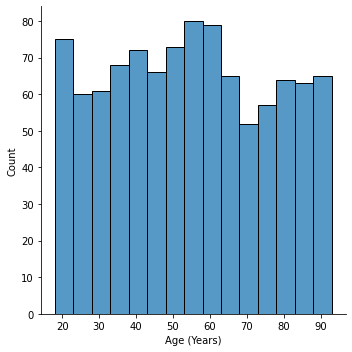

In [15]:
%matplotlib inline
age_plt = sns.displot(data = df, x = df['Age (Years)'], binwidth = 5)


+ Using our DataFrame 'df' we plot the Dependants column 
+ filling the missing values with the median value

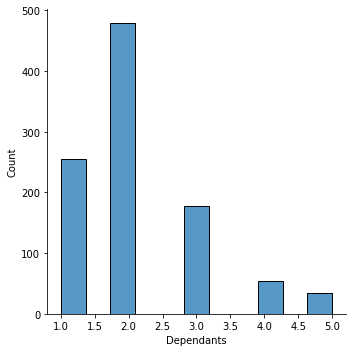

In [16]:
%matplotlib inline
dependents_plt = sns.displot(data = df, x = df['Dependants'].fillna(2) )


+ Using our DataFrame 'df' we plot the Age column conditioned on Marital Status


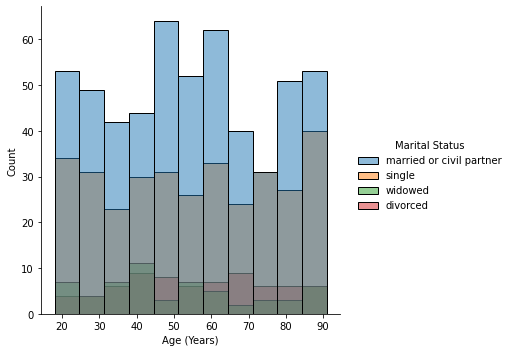

In [17]:
%matplotlib inline
status_Age_plt = sns.displot(data = df, x = df['Age (Years)'], hue = df['Marital Status'] )


+ Using our DataFrame 'df' we plot the plot the yearly salary against the distance commuted to work


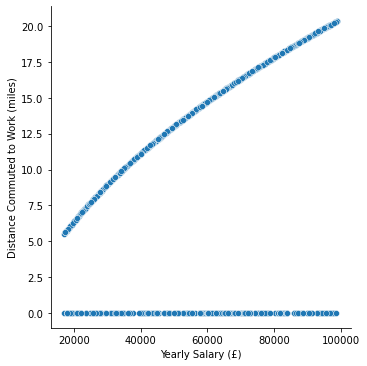

In [18]:
%matplotlib inline
commute_distance_plt = sns.relplot(data = df, x = df['Yearly Salary (£)'], y = df['Distance Commuted to Work (miles)'] )


+ Using our DataFrame 'df' we plot the yearly salary against the age(years)


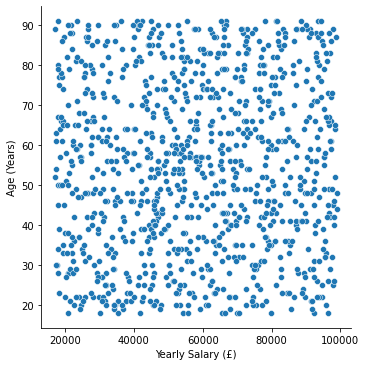

In [19]:
%matplotlib inline
salary_age_plt = sns.relplot(data = df, x = df['Yearly Salary (£)'], y = df['Age (Years)']  )

+ Using our DataFrame 'df' we plot the Age column against the yearly salary conditioned on the dependants. 
+ Filling the missing dependents columns with the median value


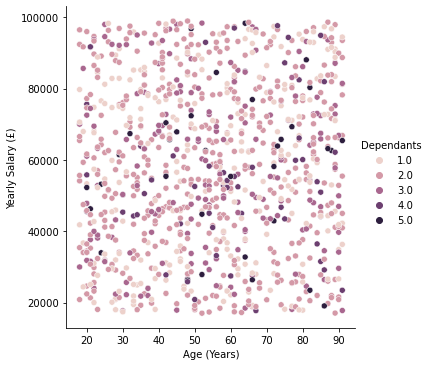

In [20]:
%matplotlib inline
salary_dependent_plt = sns.relplot(data = df, x = df['Age (Years)'], y = df['Yearly Salary (£)'], hue = df['Dependants'].fillna(2)  )


# Saving the Images

+ A dictionary {figures to save} is created each key is the filename, the value at that key is a handle to a figure.
+ the function 'savefig' is called on each value, passing it the key as the file path.

In [21]:
figures_to_save = {}
figures_to_save["./Age_Plot.png"] = age_plt
figures_to_save["./Dependent_Plot.png"] = dependents_plt
figures_to_save["./Status_Age_Plot.png"] = status_Age_plt
figures_to_save["./Commute_Distance_Plot.png"] = commute_distance_plt
figures_to_save["./Salary_Age.png"] = salary_age_plt
figures_to_save["./Salary_Dependent.png"] = salary_dependent_plt

for x,y in figures_to_save.items():
    y.savefig(x)


### Thank You